# Creating NBA Shot Charts with Python

## Dependencies

In [23]:
from nba_api.stats.endpoints import shotchartdetail, playercareerstats
from nba_api.stats.static import players, teams
from modules.datasets import NbaScraper
from modules.charts.charts import ShotCharts
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [24]:
# get player id
name = "LeBron James"
id = NbaScraper.get_json_from_name(name)['id']
print(id)
career = NbaScraper.get_player_career(id)
teams = ['CLE']
team_ids = list(set(career[career.TEAM_ABBREVIATION.isin(teams)].TEAM_ID.values))

seasons = ['2008-09']
shot_data = NbaScraper.get_shot_data(id, team_ids, seasons)
shot_data.tail()

2544


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
1608,Shot Chart Detail,0020801202,460,2544,LeBron James,1610612739,Cleveland Cavaliers,4,8,5,...,Center(C),8-16 ft.,9,42,83,1,1,20090413,IND,CLE
1609,Shot Chart Detail,0020801202,479,2544,LeBron James,1610612739,Cleveland Cavaliers,4,6,38,...,Left Side(L),24+ ft.,24,-242,55,1,0,20090413,IND,CLE
1610,Shot Chart Detail,0020801202,488,2544,LeBron James,1610612739,Cleveland Cavaliers,4,5,31,...,Right Side(R),8-16 ft.,11,77,86,1,0,20090413,IND,CLE
1611,Shot Chart Detail,0020801202,504,2544,LeBron James,1610612739,Cleveland Cavaliers,4,4,1,...,Center(C),Less Than 8 ft.,1,18,6,1,1,20090413,IND,CLE
1612,Shot Chart Detail,0020801202,526,2544,LeBron James,1610612739,Cleveland Cavaliers,4,2,9,...,Center(C),Less Than 8 ft.,1,-13,1,1,1,20090413,IND,CLE


In [25]:
shot_data.sort_values(by=['SHOT_DISTANCE'])

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
707,Shot Chart Detail,0020800578,400,2544,LeBron James,1610612739,Cleveland Cavaliers,4,5,36,...,Center(C),Less Than 8 ft.,0,0,0,1,0,20090115,CHI,CLE
297,Shot Chart Detail,0020800211,294,2544,LeBron James,1610612739,Cleveland Cavaliers,3,7,13,...,Center(C),Less Than 8 ft.,0,2,3,1,0,20081126,CLE,OKC
1427,Shot Chart Detail,0020801077,30,2544,LeBron James,1610612739,Cleveland Cavaliers,1,8,22,...,Center(C),Less Than 8 ft.,0,1,1,1,1,20090327,CLE,MIN
628,Shot Chart Detail,0020800496,499,2544,LeBron James,1610612739,Cleveland Cavaliers,4,1,1,...,Center(C),Less Than 8 ft.,0,-2,0,1,1,20090104,WAS,CLE
1188,Shot Chart Detail,0020800894,481,2544,LeBron James,1610612739,Cleveland Cavaliers,4,0,42,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20090302,MIA,CLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,Shot Chart Detail,0020801202,417,2544,LeBron James,1610612739,Cleveland Cavaliers,3,0,0,...,Back Court(BC),Back Court Shot,53,-173,507,1,0,20090413,IND,CLE
904,Shot Chart Detail,0020800704,123,2544,LeBron James,1610612739,Cleveland Cavaliers,1,0,1,...,Back Court(BC),Back Court Shot,61,192,585,1,0,20090201,DET,CLE
369,Shot Chart Detail,0020800287,271,2544,LeBron James,1610612739,Cleveland Cavaliers,2,0,0,...,Back Court(BC),Back Court Shot,66,196,632,1,0,20081206,CHA,CLE
852,Shot Chart Detail,0020800662,388,2544,LeBron James,1610612739,Cleveland Cavaliers,3,0,0,...,Back Court(BC),Back Court Shot,69,-97,692,1,0,20090127,CLE,SAC


## Shot Charts

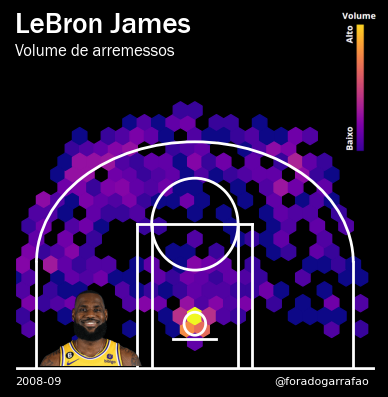

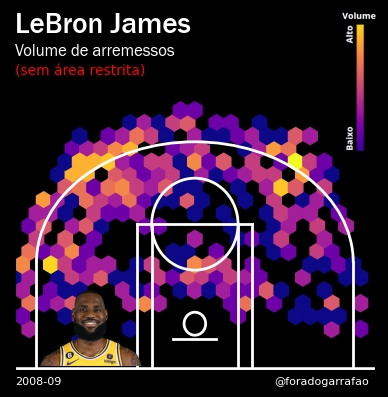

In [26]:
chart1 = ShotCharts.volume_chart(shot_data, name, seasons)
chart2 = ShotCharts.volume_chart(shot_data, name, seasons, RA=False)
plt.show()

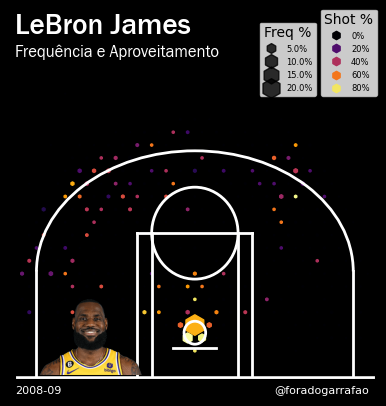

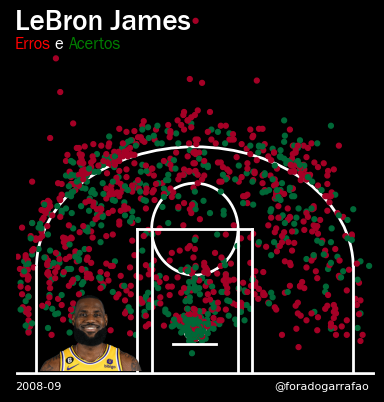

In [27]:
chart3 = ShotCharts.frequency_chart(shot_data, name, seasons)
chart4 = ShotCharts.makes_misses_chart(shot_data, name, seasons)
plt.show()